<p> In linear regression, we are trying to minimize the error between prediction and data. In SVR, our goal is to make sure errors do not exceed the threshold </p>

- SVR support both linear and nonlinear regression
- Try to fit as many instance as possible while limiting margin violations
- The width of the street is controlled by hyper parameter Epsilon
- SVR performs linear regression in a higher dimensional space
- Gaussian kernel is a good choice
- Regulazrization to improve result
-  y = Ka >> y: target vectors, K: correlation matrix, a:unknown we need to solve
- Auto Detect outlier




In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Preprcoessing

In [7]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values



### Feature Scaling


In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fit SVR to dataset



In [9]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting a new result

- Predict when x = 6.5
- Need to transform before predict
- Transform method expect input is an array (matrix)
- Inverse transform to return real prediction

In [11]:
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))
y_pred = sc_y.inverse_transform((y_pred))
y_pred

array([170370.0204065])

### Visualising the SVR results (for higher resolution and smoother curve)

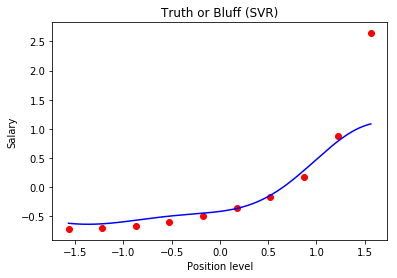

In [10]:

X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()